In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os


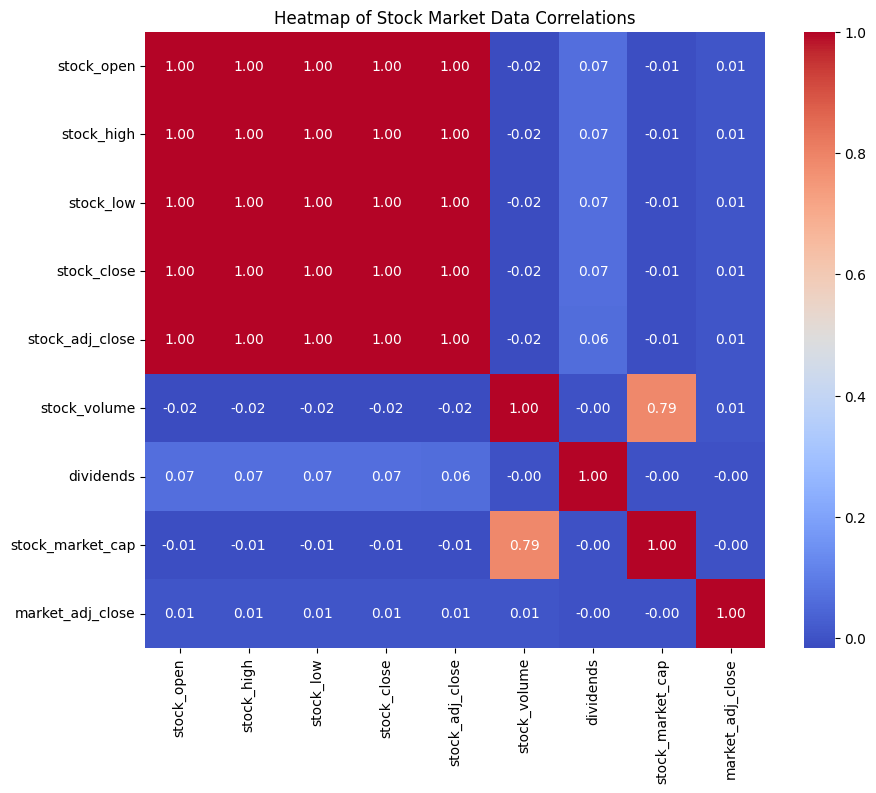

In [3]:
# Load the CSV file

path = 'C:/Users/Janet/OneDrive - The University of Chicago/Data_policy/final-project-janet'
file_name = 'combined_stock_data.csv'
file_path = os.path.join(path, file_name)
df = pd.read_csv(file_path)

# Selecting a subset of relevant columns for the heatmap
heatmap_data = df[['stock_open', 'stock_high', 'stock_low', 'stock_close', 
                   'stock_adj_close', 'stock_volume', 'dividends', 'stock_market_cap', 'market_adj_close']]

# Calculating the correlation matrix
corr = heatmap_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Stock Market Data Correlations')
plt.show()

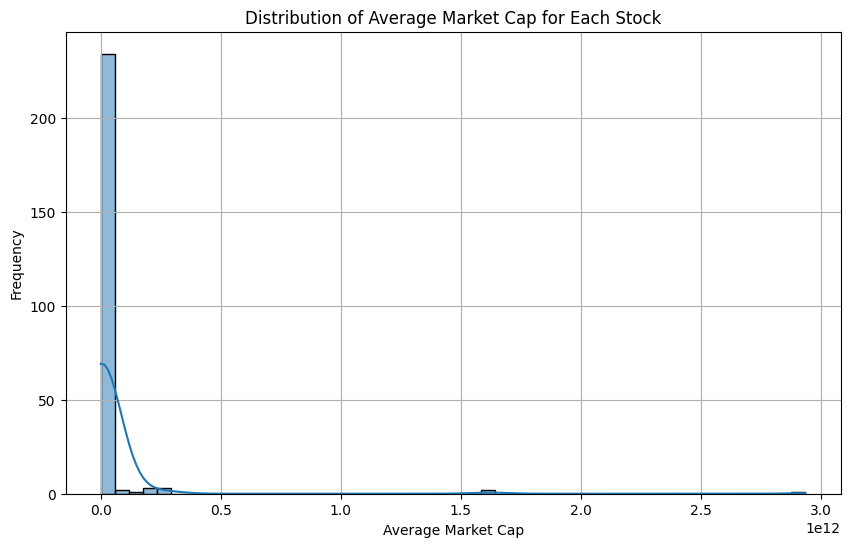

In [17]:
# Calculate the average market cap for each stock (identified by the 'ticker')
average_market_caps = df.groupby('ticker')['stock_market_cap'].mean()

# Plotting the distribution of average market caps
plt.figure(figsize=(10, 6))
sns.histplot(average_market_caps, bins=50, kde=True)
plt.title('Distribution of Average Market Cap for Each Stock')
plt.xlabel('Average Market Cap')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

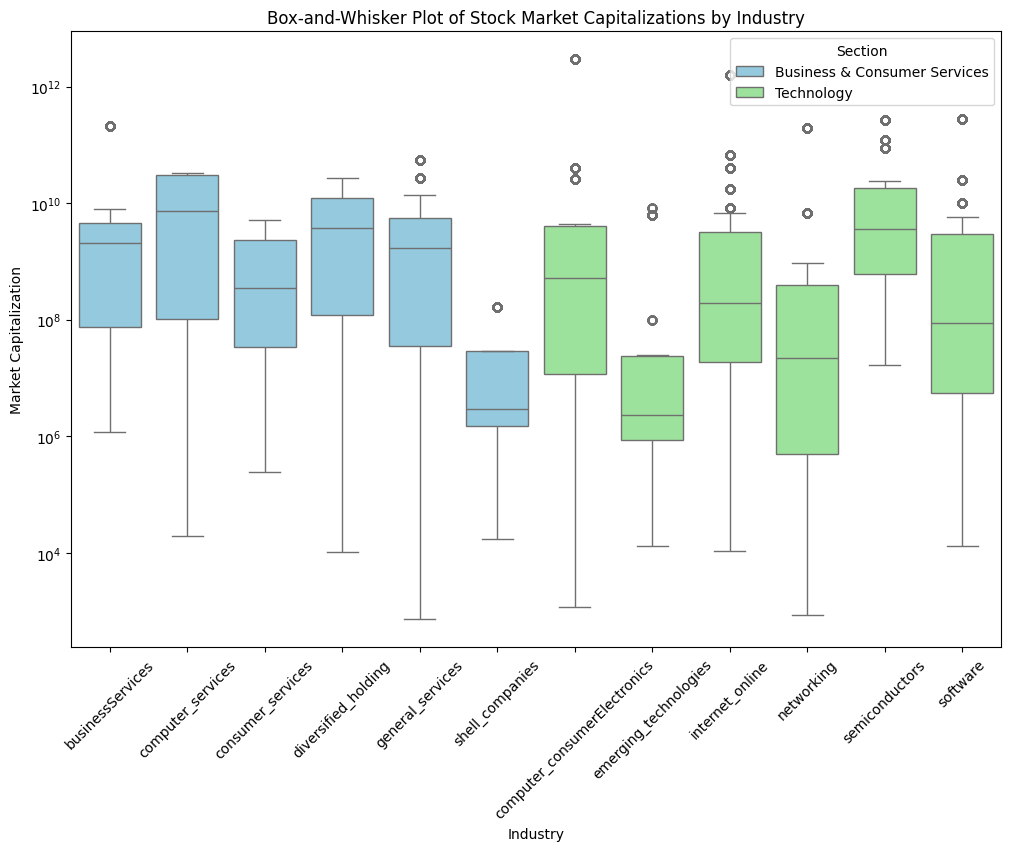

In [32]:


# Define the industry groups
business_consumer_services = ['businessServices', 'computer_services', 'consumer_services', 'diversified_holding', 'general_services', 'shell_companies']
technology = ['computer_consumerElectronics', 'emerging_technologies', 'internet_online', 'networking', 'semiconductors', 'software']

# Create a new column in the dataframe to indicate the section each industry belongs to
df['section'] = df['industry'].apply(lambda x: 'Business & Consumer Services' if x in business_consumer_services else 'Technology')

# Define a color palette for the two sections
palette = {'Business & Consumer Services': 'skyblue', 'Technology': 'lightgreen'}

# Plotting the modified Box-and-Whisker Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='industry', y='stock_market_cap', hue='section', data=df, palette=palette, dodge=False)
plt.title('Box-and-Whisker Plot of Stock Market Capitalizations by Industry')
plt.ylabel('Market Capitalization')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend(title='Section')
plt.show()


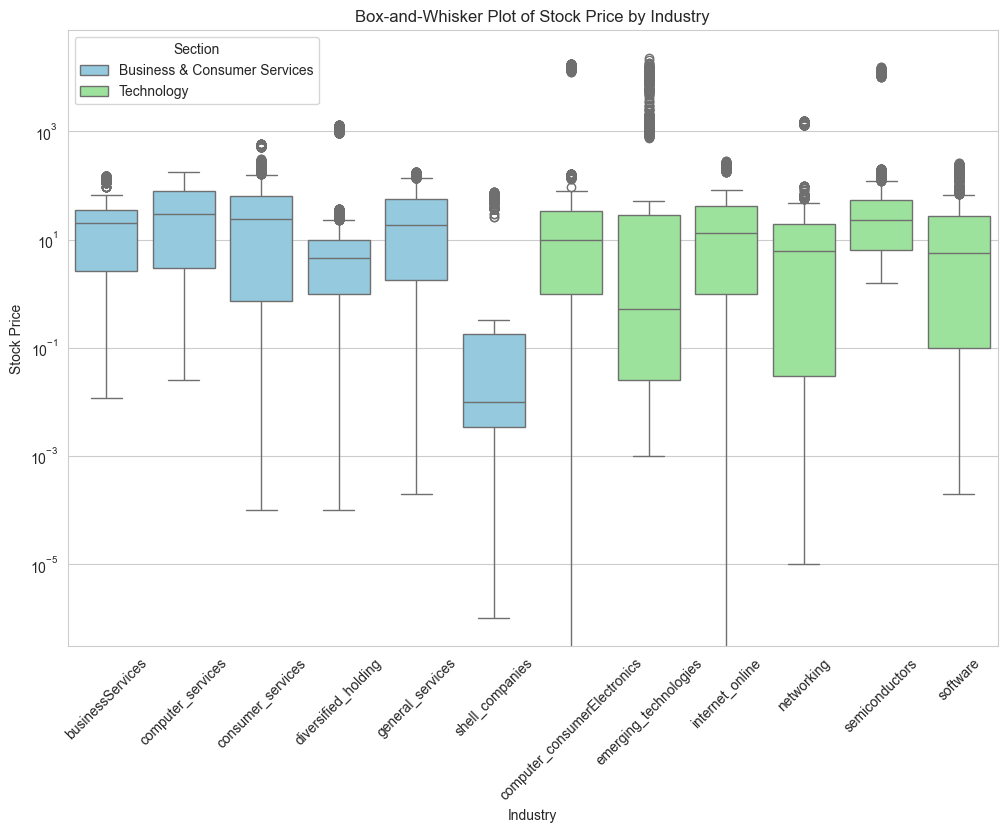

In [18]:

# Define the industry groups
business_consumer_services = ['businessServices', 'computer_services', 'consumer_services', 'diversified_holding', 'general_services', 'shell_companies']
technology = ['computer_consumerElectronics', 'emerging_technologies', 'internet_online', 'networking', 'semiconductors', 'software']

# Create a new column in the dataframe to indicate the section each industry belongs to
df['section'] = df['industry'].apply(lambda x: 'Business & Consumer Services' if x in business_consumer_services else 'Technology')

# Define a color palette for the two sections
palette = {'Business & Consumer Services': 'skyblue', 'Technology': 'lightgreen'}

# Plotting the modified Box-and-Whisker Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='industry', y='stock_adj_close', hue='section', data=df, palette=palette, dodge=False)
plt.title('Box-and-Whisker Plot of Stock Price by Industry')
plt.ylabel('Stock Price')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend(title='Section')
plt.show()

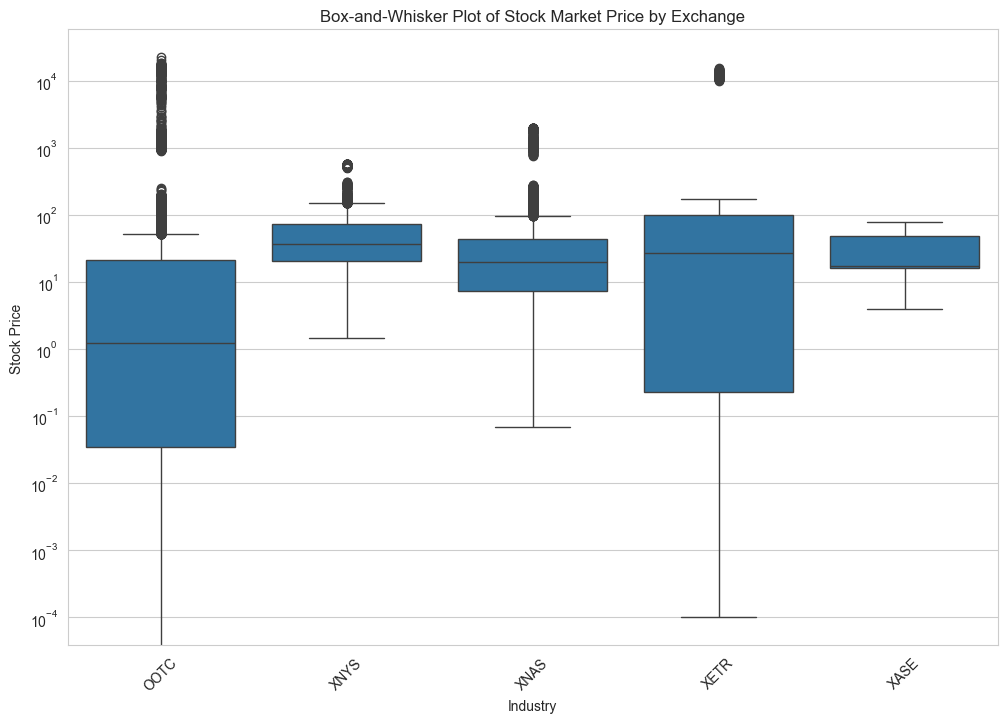

In [19]:
market_caps = df['stock_adj_close']
industries = df['exchange']

# Plotting the Box-and-Whisker Plot for 'stock_market_cap' by industry
plt.figure(figsize=(12, 8))
sns.boxplot(x=industries, y=market_caps)
plt.title('Box-and-Whisker Plot of Stock Market Price by Exchange')
plt.ylabel('Stock Price')
plt.xlabel('Industry')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yscale('log')  # Using a logarithmic scale due to large range of values
plt.show()

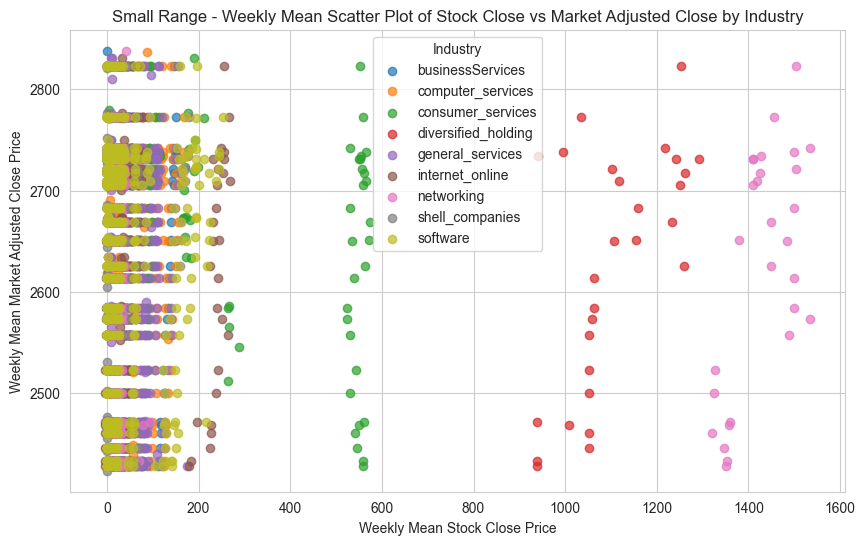

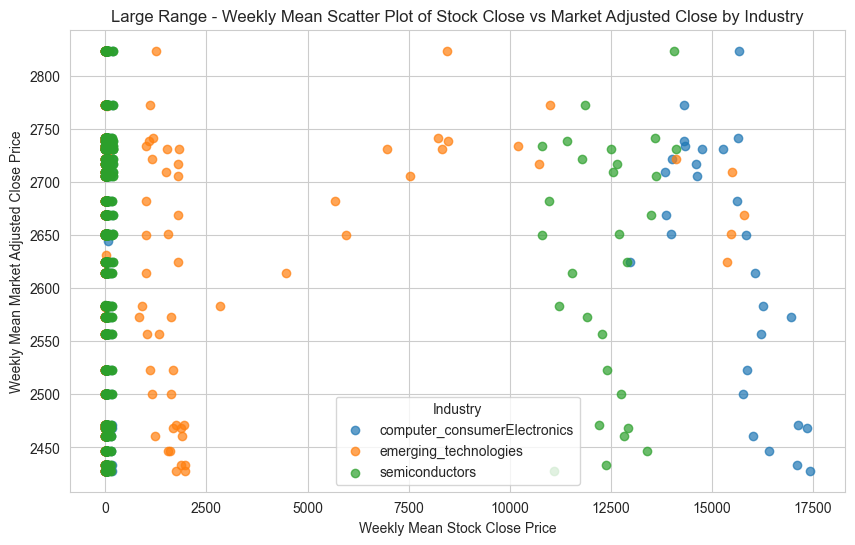

In [26]:
path = 'C:/Users/Janet/OneDrive - The University of Chicago/Data_policy/final-project-janet'
file_name = 'combined_stock_data.csv'
file_path = os.path.join(path, file_name)
df = pd.read_csv(file_path)


# Ensure your DataFrame has a datetime index
# Assuming there is a 'date' column in the DataFrame that is in the format 'YYYY-MM-DD'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Convert 'stock_adj_close' and 'market_adj_close' to numeric if they are not already
df['stock_adj_close'] = pd.to_numeric(df['stock_adj_close'], errors='coerce')
df['market_adj_close'] = pd.to_numeric(df['market_adj_close'], errors='coerce')

# Group by 'ticker' and 'industry', then resample to weekly and calculate the mean
# Only include necessary columns in the aggregation
agg_df = df.groupby(['ticker', 'industry']).resample('2W')[['stock_adj_close', 'market_adj_close']].mean().reset_index()

# Calculate the range for each industry in the weekly aggregated data
industry_ranges = agg_df.groupby('industry')['stock_adj_close'].apply(lambda x: x.max() - x.min()).to_dict()

# Split industries into small and large ranges based on a threshold
range_threshold = agg_df['stock_adj_close'].max() - agg_df['stock_adj_close'].min()
small_range_industries = [industry for industry, range_val in industry_ranges.items() if range_val < range_threshold / 2]
large_range_industries = [industry for industry, range_val in industry_ranges.items() if range_val >= range_threshold / 2]

# Plot for industries with small range
plt.figure(figsize=(10, 6))
for industry in small_range_industries:
    subset = agg_df[agg_df['industry'] == industry]
    plt.scatter(subset['stock_adj_close'], subset['market_adj_close'], label=industry, alpha=0.7)
plt.title('Small Range - Weekly Mean Scatter Plot of Stock Close vs Market Adjusted Close by Industry')
plt.xlabel('Weekly Mean Stock Close Price')
plt.ylabel('Weekly Mean Market Adjusted Close Price')
plt.legend(title='Industry')
plt.grid(True)
plt.show()

# Plot for industries with large range
plt.figure(figsize=(10, 6))
for industry in large_range_industries:
    subset = agg_df[agg_df['industry'] == industry]
    plt.scatter(subset['stock_adj_close'], subset['market_adj_close'], label=industry, alpha=0.7)
plt.title('Large Range - Weekly Mean Scatter Plot of Stock Close vs Market Adjusted Close by Industry')
plt.xlabel('Weekly Mean Stock Close Price')
plt.ylabel('Weekly Mean Market Adjusted Close Price')
plt.legend(title='Industry')
plt.grid(True)
plt.show()


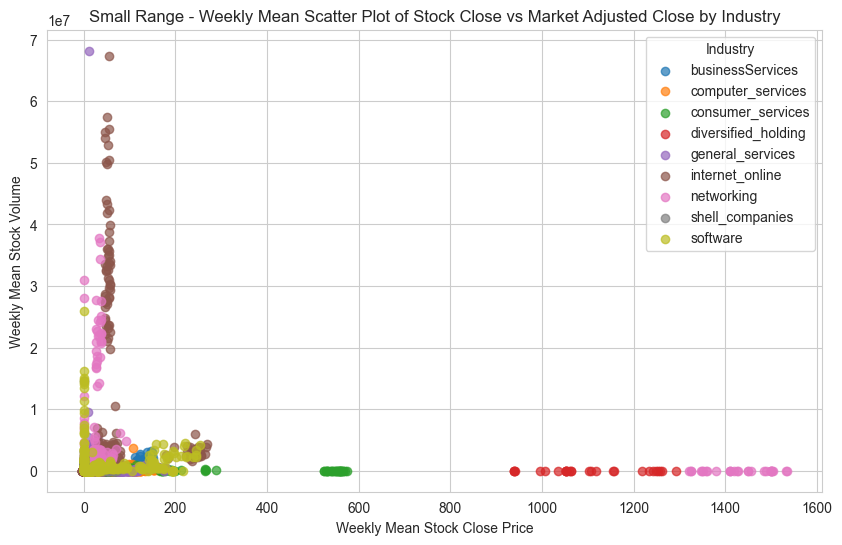

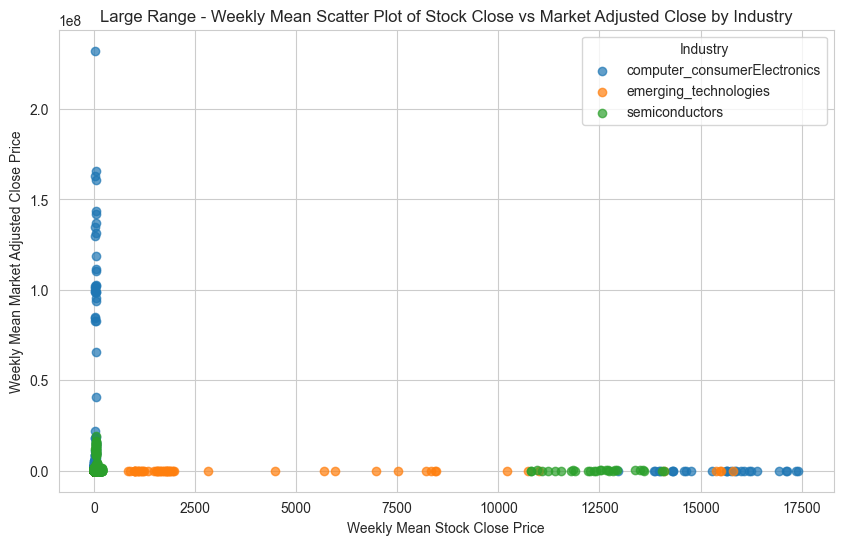

In [28]:
path = 'C:/Users/Janet/OneDrive - The University of Chicago/Data_policy/final-project-janet'
file_name = 'combined_stock_data.csv'
file_path = os.path.join(path, file_name)
df = pd.read_csv(file_path)


# Ensure your DataFrame has a datetime index
# Assuming there is a 'date' column in the DataFrame that is in the format 'YYYY-MM-DD'
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Convert 'stock_adj_close' and 'market_adj_close' to numeric if they are not already
df['stock_adj_close'] = pd.to_numeric(df['stock_adj_close'], errors='coerce')
df['stock_volume'] = pd.to_numeric(df['stock_volume'], errors='coerce')

# Group by 'ticker' and 'industry', then resample to weekly and calculate the mean
# Only include necessary columns in the aggregation
agg_df = df.groupby(['ticker', 'industry']).resample('2W')[['stock_adj_close', 'stock_volume']].mean().reset_index()

# Calculate the range for each industry in the weekly aggregated data
industry_ranges = agg_df.groupby('industry')['stock_adj_close'].apply(lambda x: x.max() - x.min()).to_dict()

# Split industries into small and large ranges based on a threshold
range_threshold = agg_df['stock_adj_close'].max() - agg_df['stock_adj_close'].min()
small_range_industries = [industry for industry, range_val in industry_ranges.items() if range_val < range_threshold / 2]
large_range_industries = [industry for industry, range_val in industry_ranges.items() if range_val >= range_threshold / 2]

# Plot for industries with small range
plt.figure(figsize=(10, 6))
for industry in small_range_industries:
    subset = agg_df[agg_df['industry'] == industry]
    plt.scatter(subset['stock_adj_close'], subset['stock_volume'], label=industry, alpha=0.7)
plt.title('Small Range - Weekly Mean Scatter Plot of Stock Close vs Market Adjusted Close by Industry')
plt.xlabel('Weekly Mean Stock Close Price')
plt.ylabel('Weekly Mean Stock Volume')
plt.legend(title='Industry')
plt.grid(True)
plt.show()

# Plot for industries with large range
plt.figure(figsize=(10, 6))
for industry in large_range_industries:
    subset = agg_df[agg_df['industry'] == industry]
    plt.scatter(subset['stock_adj_close'], subset['stock_volume'], label=industry, alpha=0.7)
plt.title('Large Range - Weekly Mean Scatter Plot of Stock Close vs Market Adjusted Close by Industry')
plt.xlabel('Weekly Mean Stock Close Price')
plt.ylabel('Weekly Mean Market Adjusted Close Price')
plt.legend(title='Industry')
plt.grid(True)
plt.show()


In [8]:
filtered_df = df[df['industry'] == 'consumer_services']

# Calculate the range of 'stock_adj_price'
range_stock_adj_price = filtered_df['stock_adj_close'].max() - filtered_df['stock_adj_close'].min()

# Print the range
print(range_stock_adj_price)

filtered_df = df[df['industry'] == 'computer_services']

# Calculate the range of 'stock_adj_price'
range_stock_adj_price = filtered_df['stock_adj_close'].max() - filtered_df['stock_adj_close'].min()

# Print the range
print(range_stock_adj_price)

filtered_df = df[df['industry'] == 'consumer_services']

# Calculate the range of 'stock_adj_price'
range_stock_adj_price = filtered_df['stock_adj_close'].max() - filtered_df['stock_adj_close'].min()

# Print the range
print(range_stock_adj_price)


587.5979834960963
177.62399389594793


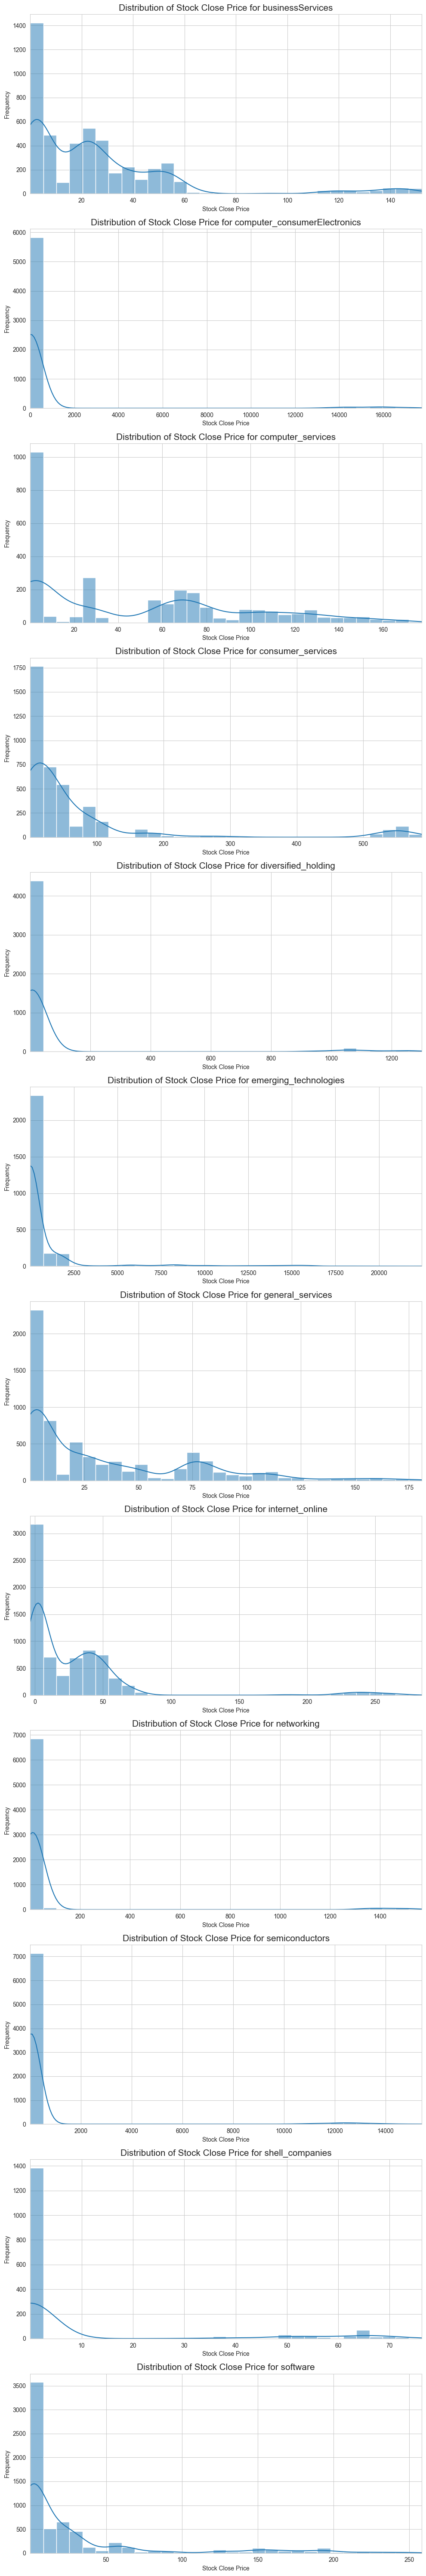

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for seaborn plots
sns.set_style('whitegrid')

# Drop NaN values from the 'industry' column
df = df.dropna(subset=['industry'])

# Calculate the number of unique industries
num_industries = df['industry'].nunique()

# Determine the number of rows needed for the subplots
num_rows = num_industries

# Create a figure with subplots - adjust the grid size as needed
# We're not sharing the x-axis scale (sharex=False) so each plot can fit appropriately
fig, axes = plt.subplots(num_rows, 1, figsize=(10, 5*num_rows), sharex=False)

# Ensure axes is always an array, even if there's only one subplot
axes = axes if num_industries > 1 else [axes]

# Loop through the industries and plot each distribution
for i, industry in enumerate(sorted(df['industry'].unique(), key=lambda v: (isinstance(v, str), v))):
    subset = df[df['industry'] == industry]
    sns.histplot(subset['stock_adj_close'], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Stock Close Price for {industry}', fontsize=15)
    axes[i].set_xlabel('Stock Close Price')
    axes[i].set_ylabel('Frequency')
    # Set the limit of x-axis based on the min and max of stock_close_price for better fit
    axes[i].set_xlim(left=subset['stock_adj_close'].min(), right=subset['stock_adj_close'].max())

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()
